IMPORTING NECESSARY LIBRARIES

In [ ]:
# IMPORT NECESSARY LIBRARIES

import gdown
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

STEP 1:

IMPORTING DATA FROM DRIVE LINK TO DATAFRAME

In [ ]:
# MOUNT GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

file_path = 'https://drive.google.com/file/d/14BM6X1YkPb3r391kXtONYzvWryFuGpOF/view?usp=drive_link'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# SPECIFY FILE ID

file_id = '14BM6X1YkPb3r391kXtONYzvWryFuGpOF'

In [ ]:
# CONSTRUCT DOWNLOAD URL

download_url = f"https://drive.google.com/uc?id=14BM6X1YkPb3r391kXtONYzvWryFuGpOF"

In [ ]:
# DOWNLOAD FILE

output = 'Emotion_final.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=14BM6X1YkPb3r391kXtONYzvWryFuGpOF
To: /content/Emotion_final.csv
100%|██████████| 2.26M/2.26M [00:00<00:00, 166MB/s]


'Emotion_final.csv'

In [ ]:
# LOAD DATASET INTO DATAFRAME

df = pd.read_csv(output)

In [ ]:
# DISPALY DATAFRAME

df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,I am in love with you,love
4,i am ever feeling nostalgic about the fireplac...,love
...,...,...
21488,I don't know what to do,confusion
21489,I have never come across this kind of situation,confusion
21490,Which way should I go?,confusion
21491,I barely understood anything,confusion


STEP 2:

DATA CLEANING

In [ ]:
# CHECK FOR MISSING VALUES

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Text       0
Emotion    0
dtype: int64


In [ ]:
# CHECK FOR DUPLICATES

duplicates = df.duplicated().sum()
print("Duplicates:\n", duplicates)

Duplicates:
 3


In [ ]:
# REMOVE DUPLICATES

df_cleaned = df.drop_duplicates()

In [ ]:
# DUPLICATES AFTER REMOVAL

print("Duplicates after cleaning:\n", df_cleaned.duplicated().sum())

Duplicates after cleaning:
 0


In [ ]:
# DISPLAY OF CLEANED DATA

df_cleaned

,Text,Emotion,Emotion_encoded
0,i didnt feel humiliated,sadness,5
1,i can go from feeling so hopeless to so damned...,sadness,5
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,I am in love with you,love,4
4,i am ever feeling nostalgic about the fireplac...,love,4
...,...,...,...
21488,I don't know what to do,confusion,1
21489,I have never come across this kind of situation,confusion,1
21490,Which way should I go?,confusion,1
21491,I barely understood anything,confusion,1


VISUALIZATION

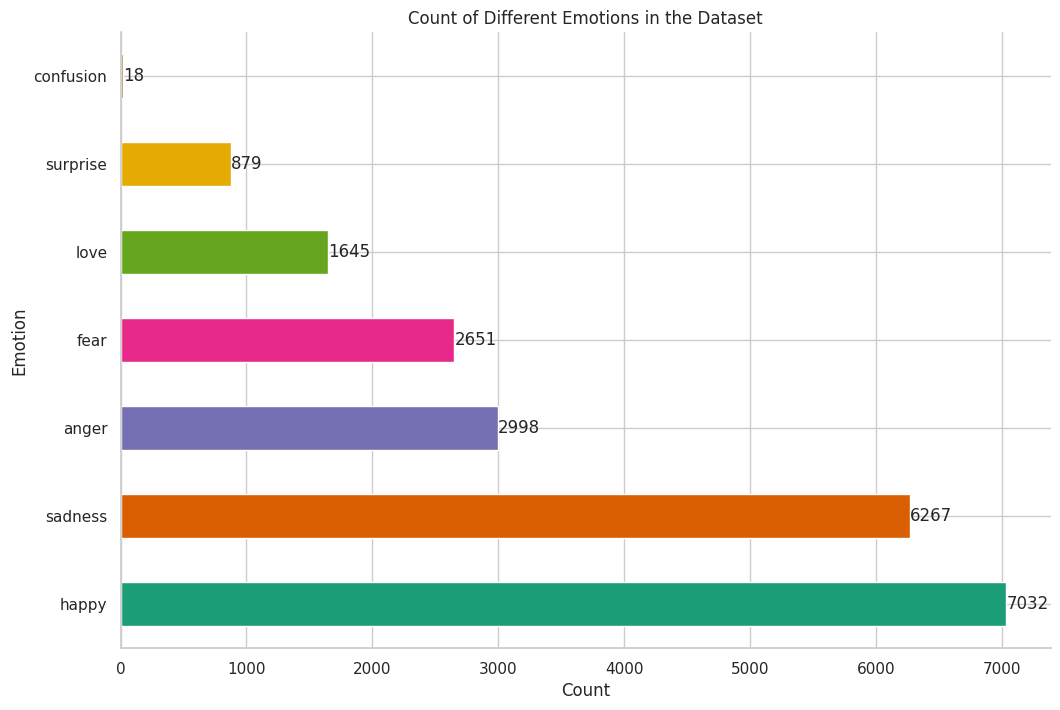

In [ ]:
# PLOT THE BAR

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
axis = emotion_counts.plot(kind='barh', color=sns.color_palette('Dark2', len(emotion_counts)))


for index, value in enumerate(emotion_counts):
    axis.text(value, index, str(value), va='center')
plt.gca().spines[['top', 'right']].set_visible(False)


plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Count of Different Emotions in the Dataset')
plt.show()

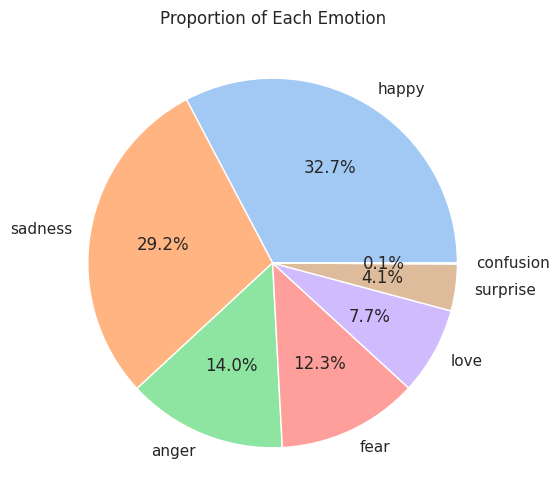

In [ ]:
# PLOT THE PIE CHART

plt.figure(figsize=(10, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(emotion_counts)))
plt.title('Proportion of Each Emotion')
plt.show()

<ipython-input-59-5494a8bcf7c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Text Length', data=df, palette='viridis')


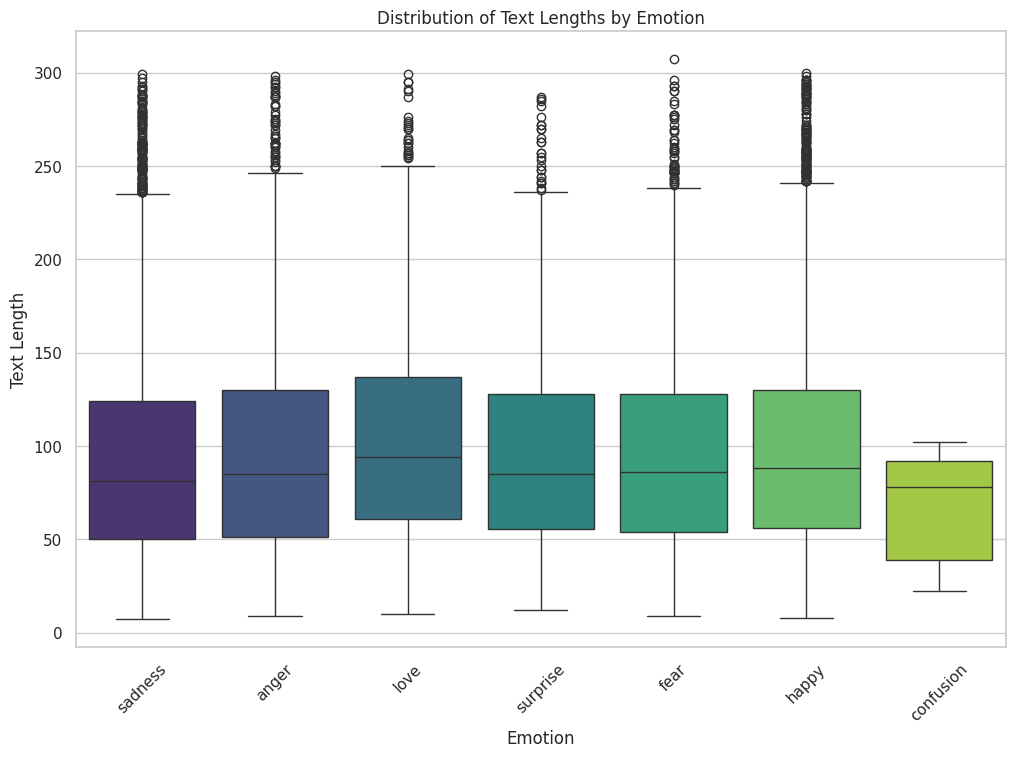

In [ ]:
# CALCULATE THE LENGTH OF EACH TEXT ENTRY
df['Text Length'] = df['Text'].apply(len)


# PLOT THE BOX PLOT
plt.figure(figsize=(12, 8))
sns.boxplot(x='Emotion', y='Text Length', data=df, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Text Length')
plt.title('Distribution of Text Lengths by Emotion')
plt.xticks(rotation=45)
plt.show()


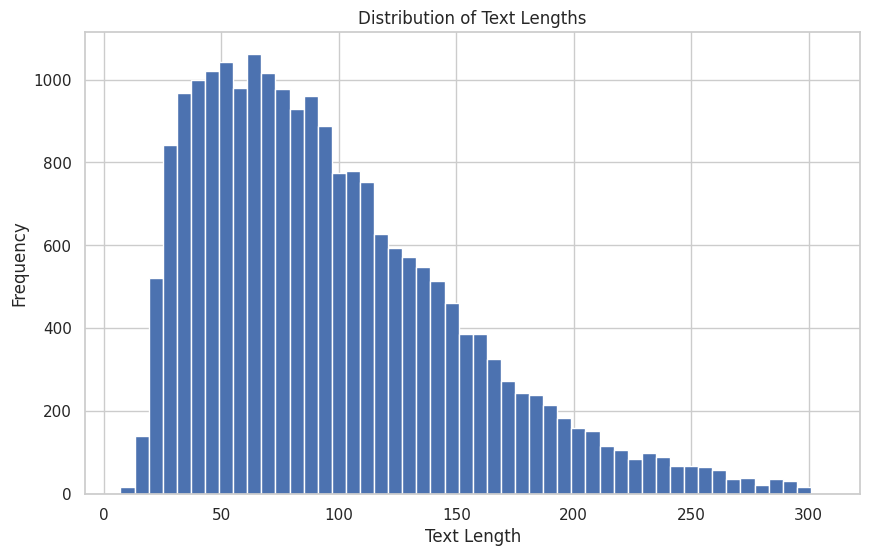

In [ ]:
# CALCULATE TEXT LENGTH

df['Text Length'] = df['Text'].apply(len)


# PLOT HISTOGRAM

plt.figure(figsize=(10, 6))
df['Text Length'].hist(bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

STEP 3:

DATA PREPROCESSING

In [ ]:
# LABEL ENCODE THE EMOTION COLUMN

label_encoder = LabelEncoder()
df_cleaned['Emotion_encoded'] = label_encoder.fit_transform(df_cleaned['Emotion'])

<ipython-input-61-793470c74ee9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Emotion_encoded'] = label_encoder.fit_transform(df_cleaned['Emotion'])


In [ ]:
# LABEL ENCODE THE EMOTION COLUMN

emotion_counts = df_cleaned['Emotion'].value_counts()
print("Count of different emotions in the dataset:",emotion_counts)

Count of different emotions in the dataset: Emotion
happy        7032
sadness      6267
anger        2998
fear         2651
love         1645
surprise      879
confusion      18
Name: count, dtype: int64


In [ ]:
# SEPERATE TARGET AND FEATURE VARIABLES

X = df_cleaned['Text']
y = df_cleaned['Emotion_encoded']

In [ ]:
# CONVERT TEXT INTO NUMERICAL FEATURES

count_vectorizer = CountVectorizer(max_features=5000)
X = count_vectorizer.fit_transform(X).toarray()

STEP 4:

MODEL TRAINING AND EVALUATION

In [ ]:
# MODEL TRAINING

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# MODEL EVALUATION

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the model: {accuracy:.2f}')

Accuracy of the model: 0.87


STEP 5:

In [ ]:
# ACCURACY PERCENTAGE

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.76%


In [ ]:
# CLASSIFICATION REPORT

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

       anger       0.85      0.87      0.86       594
   confusion       1.00      0.50      0.67         4
        fear       0.84      0.83      0.84       548
       happy       0.85      0.93      0.89      1412
        love       0.86      0.68      0.76       349
     sadness       0.92      0.89      0.90      1218
    surprise       0.79      0.68      0.73       173

    accuracy                           0.87      4298
   macro avg       0.87      0.77      0.81      4298
weighted avg       0.87      0.87      0.87      4298



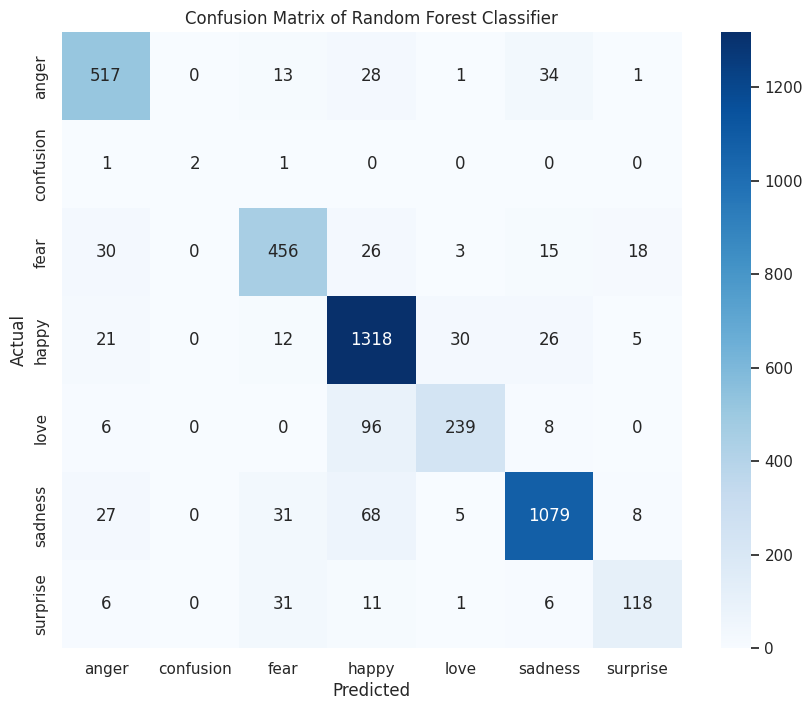

In [ ]:
# CONFUSION MATRIX

conf_matrix = confusion_matrix(y_test, y_pred)


# VISUALIZE THE CONFUSION MATRIX

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()
